<a id='intro'></a>
## Introduction

### Data Discription
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up
for their appointment. A number of characteristics about the patient are included in each row.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Questions to answer
- What factors are important for us to know in order to predict if a patient will not show up for their scheduled appointment?
  - Q1) Which neighbourhoods has the highest number of no show appointments?
  - Q2) Is gender factor in the no show appointments?
  - Q3) Is Age factor in the no show appointments?
  - Q4) Is Scholarship factor in the no show appointments?
  - Q5) Is Handicap factor in the no show appointments?
  - Q6) Is the day of the week factor in the no show appointments?


<a id='wrangling'></a>
## Data Wrangling

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [193]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# printing first five rows to check
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [194]:
df.shape

(110527, 14)

so there is 110527 rows and 14 columns in this dataset, then we should check datatypes, null values.

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We can see that:
- there are no NULL values.
- ScheduledDay and AppointmentDay should be datetime not object.

So let's check for duplicates

In [196]:
# check for duplicated rows
df.duplicated().sum()

0

There aren no duplicated rows.

In [197]:
# number of non-null unique values for each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We can see that:
- 62,299 Patient ids so this means that some patients had more than one appointment.
- Only 27 unique appointment days.
- 81 unique neighbourhoods.

In [198]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that:
- The average age in this dataset is 37, and the heighest age is 115, while -1 is the minimum age which is an issue.

In [199]:
negative_age = df.query('Age == "-1"')
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


we can see that only one row has age of -1, so we are going to drop it in the cleaning pahse


now let's check value counts in Handcap column

In [200]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

There are a few cases of more than one handicap. We don't need to know how many handicaps a patient had, we just need to know if he was handicapped or not, so I will change these values to 0 means not handicapped, 1 means handicapped in the cleaning phase.

Finally, let's visualize the data

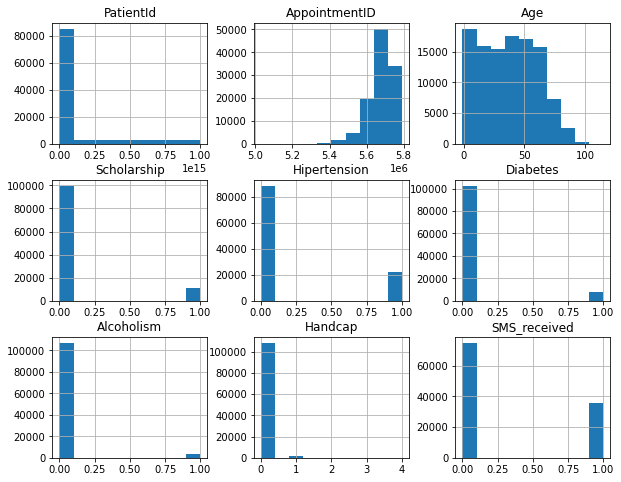

In [201]:
df.hist(figsize=(10,8));

### Data Cleaning

#### Fixing typos in data columns

In [202]:
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

#### Converting ScheduledDay and AppointmentDay to datetime datatype

In [203]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#### Fixing the negative age values

In [204]:
df.drop(negative_age.index, inplace=True)

#### Fixing handicap values

In [205]:
# if the value is greater than 1 change it to 1, otherwise 0
df['Handicap'] = np.where(df['Handicap'] >= 1, 1, 0)
df.Handicap.value_counts()

0    108285
1      2241
Name: Handicap, dtype: int64

#### Fixing No_show values

In [206]:
# if the value Yes then change it to 1, otherwise 0
df.No_show = np.where(df.No_show == "Yes", 1, 0)

#### Finally, let's visualize the data after cleaning

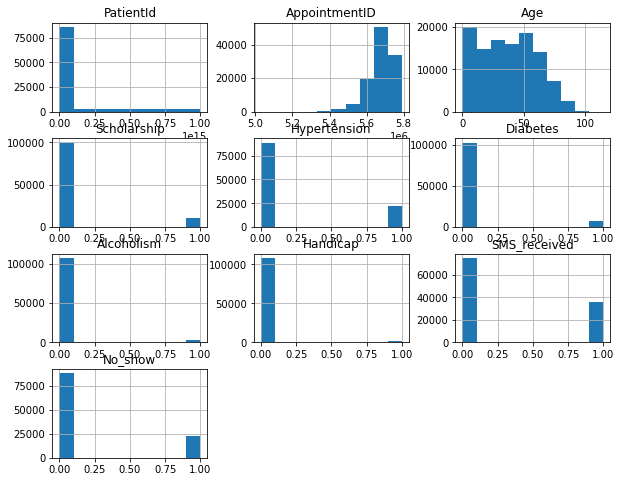

In [207]:
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Main Question (What factors are important for us to know in order to predict if a patient will not show up for their scheduled appointment?)

#### No_show column

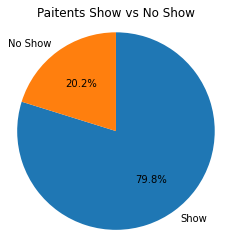

In [208]:
# Plot the proportion of NoShows as a piechart.
sorted_counts = df.No_show.value_counts()
plt.pie(sorted_counts, labels = ['Show', 'No Show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show vs No Show');

Over 20% of all appointments was no shows. The next questions will attempt to answer if there are common factors within this group.

#### Q1) Which neighbourhoods has the highest number of no show appointments?

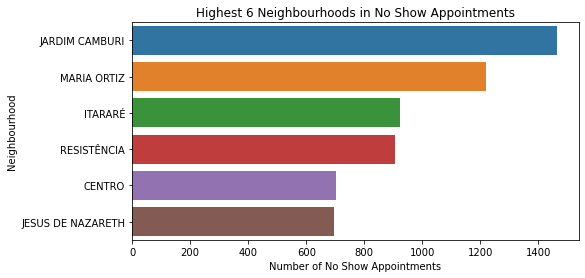

In [209]:
# no show appointments
df_no_show = df[df.No_show == 1]

# plot a horizontal bar chart
plt.figure(figsize = [8, 4])
cat_order = df_no_show['Neighbourhood'].value_counts().index[:6]
sns.countplot(data = df_no_show, y = 'Neighbourhood', order = cat_order)
plt.title('Highest 6 Neighbourhoods in No Show Appointments')
plt.xlabel('Number of No Show Appointments')
plt.ylabel('Neighbourhood');

We can see that:
    
- JARDIM CAMBURI neighbourhood had the heighest number of missed appointments followed by MARIA ORTIZ.

In [230]:
#function to produce a plot for the precentage of no show for a certain column
def no_show_perc_plot(column, x= 0, y =0):
    # percentages of no show patients based on a column
    no_show_col = df.groupby(column).No_show.mean() * 100

    # plot a bar chart
    plt.bar(x = no_show_col.index, height = no_show_col)
    if(x):
        plt.xticks([0, 1], [x, y])
    plt.title('The percentages of no show appointments based on ' + column)
    plt.ylabel('No show percentage');

#### Q2) Is gender factor in the no show appointments?

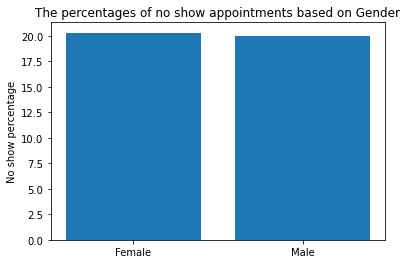

In [231]:
# percentages of no show patients based on gender
no_show_perc_plot('Gender', 'Female', 'Male')

We can see that:
- the percentages of no show patients between thw two genders are pretty close.

So, we can say that:
- the gender can't be considered as a factor in no show up appointment.

#### Q3) Is Age factor in the no show appointments?

In [211]:
#classify age to 4 groups
bin_edges = [0, 18, 37, 55, 115]

# labels for the four age groups
bin_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['Age'], bin_edges, labels=bin_names)

# insert a new column (age_group) before column 6
df.insert(6, 'age_group', age_group)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,age_group,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,56 and above,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,56 and above,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,56 and above,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,56 and above,JARDIM DA PENHA,0,1,1,0,0,0,0


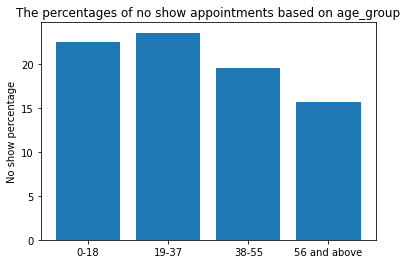

In [229]:
# percentages of no show patients based on age group
no_show_perc_plot('age_group')

We can see that:
- The age group (19-37) missed their appointments the most.
- The age group (56 and above) were the most show up. 

So, we can say that:
- The older the person is the more likely going to show up. 

#### Q4) Is Scholarship factor in the no show appointments?

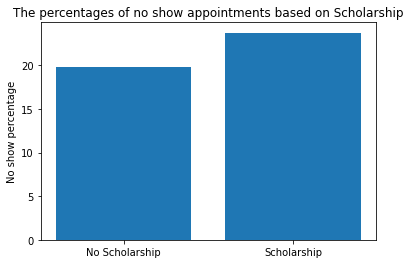

In [233]:
# percentages of no show patients based on scholarship
no_show_perc_plot('Scholarship', 'No Scholarship', 'Scholarship')

We can see that:
- About 24% of patients with scholarship didn't show up for their appointments.
- About 20% of patients without scholarship didn't show up for their appointments. 

So, we can say that:
- Patient with a scholarship is more likely to not show up for the appointment.

#### Q5) Is Handicap factor in the no show appointments?

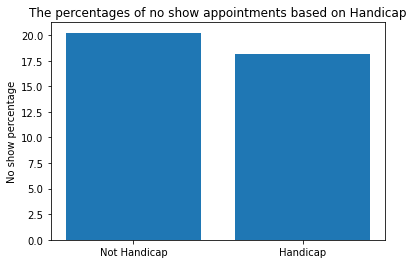

In [234]:
# percentages of no show patients based on Handicap
no_show_perc_plot('Handicap', 'Not Handicap', 'Handicap')

We can see that:
- About 20% of patients with Handicap didn't show up for their appointments.
- About 17% of patients without Handicap didn't show up for their appointments. 

So, we can say that:
- Patient with no Handicap is more likely to not show up for the appointment.

#### Q6) Is the day of the week factor in the no show appointments?

In [215]:
# find which day of the week the appointment was on
week_day = df.AppointmentDay.dt.weekday 
# insert a new column (week_day) before column 5
df.insert(5, 'Week_day', week_day)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Week_day,Age,age_group,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,4,62,56 and above,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,4,56,56 and above,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,4,62,56 and above,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,4,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,4,56,56 and above,JARDIM DA PENHA,0,1,1,0,0,0,0


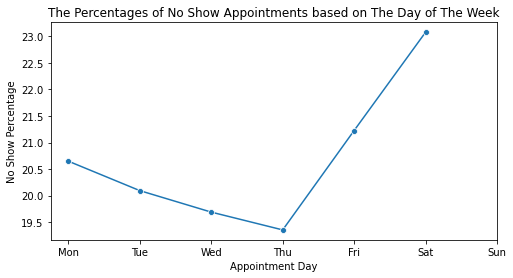

In [216]:
# percentages of no show appointments based on week day
no_show_weekday = df.groupby('Week_day').No_show.mean() * 100
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# plot a line plot
plt.figure(figsize = [8, 4])
sns.lineplot(x = no_show_weekday.index,  y = no_show_weekday, marker='o')
plt.title('The Percentages of No Show Appointments based on The Day of The Week')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel('Appointment Day')
plt.ylabel('No Show Percentage');

We can see that:
- Saturday with about 23% of appointments no show up.
- Friday with about 21% of the appointments no show up.
- Thursday with about 19.4% of the appointments no show up. 
- Wednesday with about 19.7% of the appointments no show up. 

So, we can say that:
- Patients are more likely to miss their appointments on weekends and the days that are close to it (Monday, Friday).

<a id='conclusions'></a>
## Conclusions


In this research I analyzed some factors that are important for us to know in order to predict if a patient will not show up for their scheduled appointment.

I found out that:
- Over 20% of all appointments was no shows.
- JARDIM CAMBURI neighbourhood had the heighest number of missed appointments followed by MARIA ORTIZ.
- the gender can't be considered as a factor in no show up appointment.
- The older the person is the more likely going to show up.
- Patient with no Handicap is more likely to not show up for the appointment.
- Patients are more likely to miss their appointments on weekends and the days that are close to it (Monday, Friday).

Limitations:
- Missing features that could be useful to get more insights on the factors for not showing up such as if the patient is employeed or not , or whether the patient have a series medical issue or not.
- there we some unlogical data such as patients with age 0 or -1.
- Recent data would have been better, since 2016 is about 4 years ago.